In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

class CNNModel:
    def __init__(self, input_shape=(150, 150, 3)):
        self.model = Sequential()
        self.build_model(input_shape)

    def build_model(self, input_shape):
        # First convolutional layer
        self.model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
        self.model.add(MaxPooling2D(2, 2))

        # Second convolutional layer
        self.model.add(Conv2D(64, (3, 3), activation='relu'))
        self.model.add(MaxPooling2D(2, 2))

        # Third convolutional layer
        self.model.add(Conv2D(128, (3, 3), activation='relu'))
        self.model.add(MaxPooling2D(2, 2))

        # Flatten the results to feed into a dense layer
        self.model.add(Flatten())

        # Hidden dense layer
        self.model.add(Dense(512, activation='relu'))
        self.model.add(Dropout(0.5))

        # Output layer
        self.model.add(Dense(1, activation='sigmoid'))

    def compile_model(self):
        self.model.compile(
            loss='binary_crossentropy',
            optimizer='adam',
            metrics=['accuracy']
        )

    def summary(self):
        self.model.summary()

    def get_model(self):
        return self.model

In [2]:
import shutil
shutil.unpack_archive('cheating.zip', '/content')

ModuleNotFoundError: No module named 'model'

In [3]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:

base_dir = '/content/cheating'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only rescaling for validation and test data
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Flow validation images in batches
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Flow test images in batches
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 4737 images belonging to 2 classes.
Found 108 images belonging to 2 classes.
Found 88 images belonging to 2 classes.


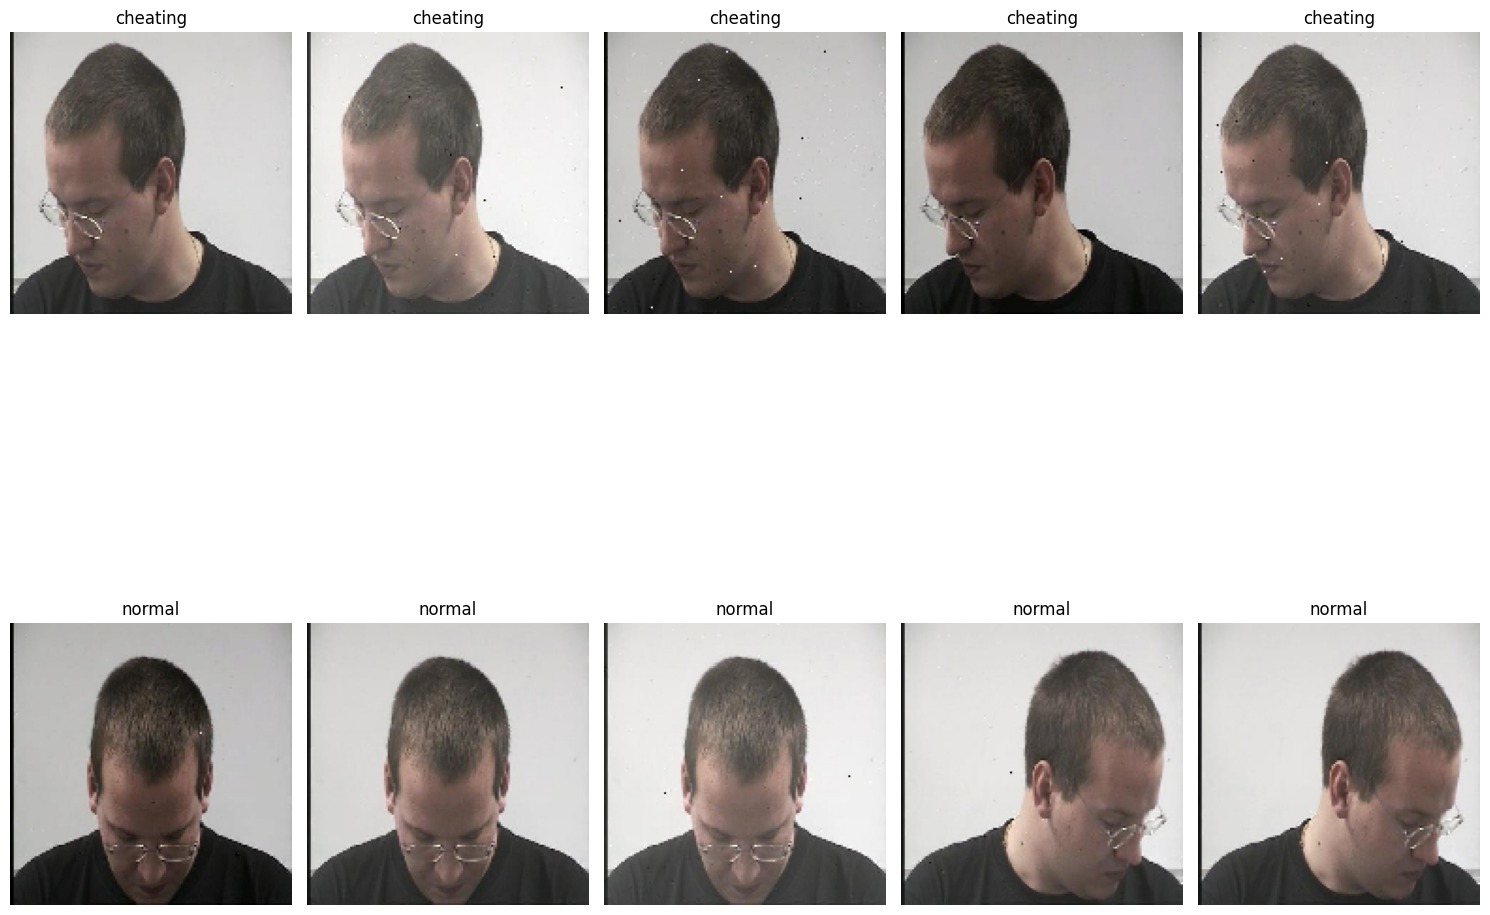

In [5]:
import itertools

def plot_sample_images(generator, class_indices, num_classes=2, samples_per_class=5):
    plt.figure(figsize=(15, 15))
    for class_label, class_name in enumerate(class_indices):
        class_dir = os.path.join(generator.directory, class_name)
        image_files = os.listdir(class_dir)[:samples_per_class]
        for i, image_file in enumerate(image_files):
            img_path = os.path.join(class_dir, image_file)
            img = load_img(img_path, target_size=(150, 150))
            img_array = img_to_array(img)
            plt.subplot(num_classes, samples_per_class, class_label * samples_per_class + i + 1)
            plt.imshow(img_array.astype('uint8'))
            plt.title(class_name)
            plt.axis('off')
    plt.tight_layout()
    plt.show()

# Get class labels
class_labels = list(train_generator.class_indices.keys())

# Plot sample images
plot_sample_images(train_generator, class_labels)

In [6]:
# Define the CNN model
model = Sequential([
    # First Convolutional Layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    # Second Convolutional Layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third Convolutional Layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten the output
    Flatten(),

    # Dense Layer
    Dense(512, activation='relu'),
    Dropout(0.5),

    # Output Layer
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Display the model's architecture
model.summary()

c:\Users\91997\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
!pip install pydot graphviz


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


AttributeError: module 'pydot' has no attribute 'InvocationException'

In [8]:
# Define callbacks
checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max'
)

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    verbose=1,
    mode='max',
    restore_best_weights=True
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[checkpoint, early_stop]
)

Epoch 1/50


c:\Users\91997\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.5365 - loss: 0.7383
Epoch 1: val_accuracy improved from -inf to 0.59375, saving model to best_model.keras
148/148 ━━━━━━━━━━━━━━━━━━━━ 69s 441ms/step - accuracy: 0.5366 - loss: 0.7380 - val_accuracy: 0.5938 - val_loss: 0.6341
Epoch 2/50
  1/148 ━━━━━━━━━━━━━━━━━━━━ 21s 149ms/step - accuracy: 0.5312 - loss: 0.6796
Epoch 2: val_accuracy did not improve from 0.59375
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - accuracy: 0.5312 - loss: 0.3421 - val_accuracy: 0.5833 - val_loss: 0.3387
Epoch 3/50


c:\Users\91997\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - accuracy: 0.5799 - loss: 0.6735
Epoch 3: val_accuracy improved from 0.59375 to 0.83333, saving model to best_model.keras
148/148 ━━━━━━━━━━━━━━━━━━━━ 35s 234ms/step - accuracy: 0.5801 - loss: 0.6734 - val_accuracy: 0.8333 - val_loss: 0.5131
Epoch 4/50
  1/148 ━━━━━━━━━━━━━━━━━━━━ 21s 143ms/step - accuracy: 0.6562 - loss: 0.5892
Epoch 4: val_accuracy did not improve from 0.83333
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - accuracy: 0.6562 - loss: 0.2966 - val_accuracy: 0.7500 - val_loss: 0.2869
Epoch 5/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.6794 - loss: 0.5984
Epoch 5: val_accuracy did not improve from 0.83333
148/148 ━━━━━━━━━━━━━━━━━━━━ 34s 226ms/step - accuracy: 0.6795 - loss: 0.5984 - val_accuracy: 0.7812 - val_loss: 0.4558
Epoch 6/50
  1/148 ━━━━━━━━━━━━━━━━━━━━ 20s 140ms/step - accuracy: 0.8438 - loss: 0.4810
Epoch 6: val_accuracy improved from 0.83333 to 0.91667, saving model to best_model.keras
148/148 ━━━━━━━━━━

In [11]:
# Load the best saved model
best_model = load_model('best_model.keras')

# Evaluate on the test set
test_loss, test_accuracy = best_model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9375 - loss: 0.2424
Test Accuracy: 90.62%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Confusion Matrix
[[44  0]
 [ 6 14]]
Classification Report
              precision    recall  f1-score   support

    cheating       0.88      1.00      0.94        44
      normal       1.00      0.70      0.82        20

    accuracy                           0.91        64
   macro avg       0.94      0.85      0.88        64
weighted avg       0.92      0.91      0.90        64



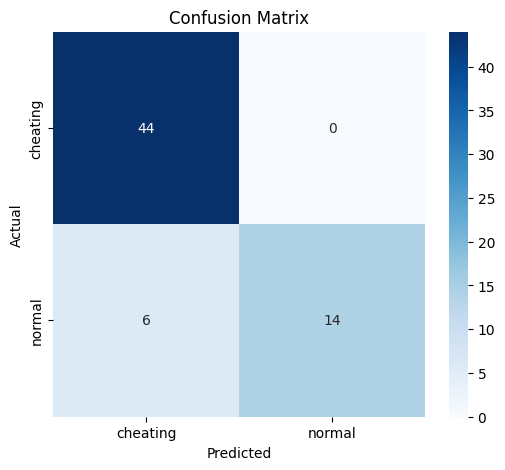

In [12]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict the probabilities for test images
test_generator.reset()
predictions = best_model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size, verbose=1)

# Convert probabilities to class labels
predicted_classes = (predictions > 0.5).astype(int).ravel()

# Get true labels
true_classes = test_generator.classes[:len(predicted_classes)]

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
print('Confusion Matrix')
print(cm)

# Classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print('Classification Report')
print(report)

# Plot confusion matrix
import seaborn as sns

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# Save the final model
model.save('final_model.keras')
print("Model saved as 'final_model.keras'")

Model saved as 'final_model.keras'


In [14]:
# Load the saved model
loaded_model = load_model('final_model.keras')
print("Model loaded successfully.")

Model loaded successfully.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


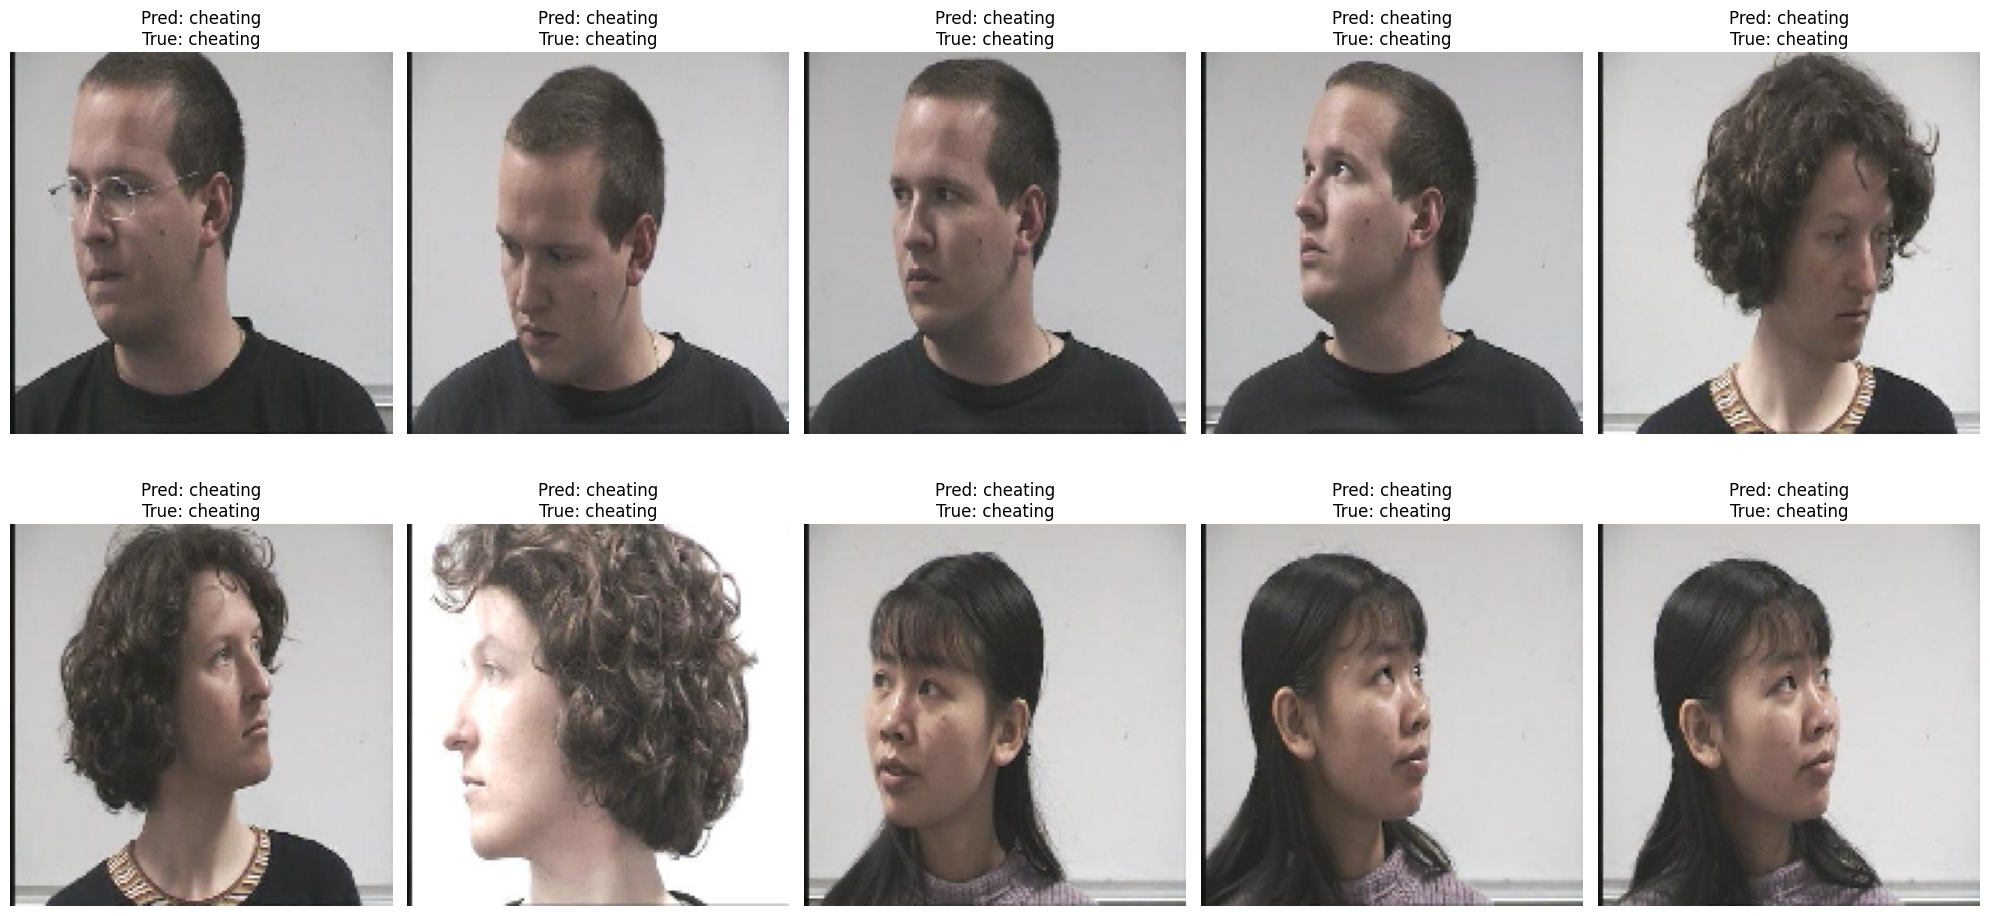

In [15]:
# Reset test generator
test_generator.reset()

# Predict probabilities
probabilities = loaded_model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size, verbose=1)

# Convert probabilities to class labels
predicted_classes = (probabilities > 0.5).astype(int).ravel()

# Get true labels
true_classes = test_generator.classes[:len(predicted_classes)]

# Map class indices to class labels
class_labels = list(train_generator.class_indices.keys())

# Display some predictions
num_predictions = 10
plt.figure(figsize=(20, 10))
for i in range(num_predictions):
    img_path = os.path.join(test_generator.directory, test_generator.filenames[i])
    img = load_img(img_path, target_size=(150, 150))
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(f"Pred: {class_labels[predicted_classes[i]]}\nTrue: {class_labels[true_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [16]:
!pip install opencv-python


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

In [18]:
# Load the trained model
model = load_model('best_model.keras')

In [19]:
def preprocess_frame(frame, target_size=(150, 150)):
    """
    Preprocesses a frame captured from the webcam for prediction.

    Parameters:
        frame (numpy.ndarray): The image frame captured from the webcam.
        target_size (tuple): The target size for the CNN model.

    Returns:
        numpy.ndarray: The preprocessed image ready for prediction.
    """
    # Resize the frame to match the input size of the model
    resized_frame = cv2.resize(frame, target_size)

    # Convert the image from BGR (OpenCV format) to RGB
    rgb_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2RGB)

    # Convert the image to array
    img_array = img_to_array(rgb_frame)

    # Expand dimensions to match the shape (1, 150, 150, 3)
    img_array = np.expand_dims(img_array, axis=0)

    # Rescale the image
    img_array /= 255.0

    return img_array

In [20]:
def predict_frame(model, processed_frame):
    """
    Predicts the class of the given preprocessed frame.

    Parameters:
        model (keras.Model): The trained CNN model.
        processed_frame (numpy.ndarray): The preprocessed image.

    Returns:
        str: The predicted class label.
        float: The confidence score of the prediction.
    """
    prediction = model.predict(processed_frame)[0][0]
    if prediction > 0.25:
        return "Cheating", prediction
    else:
        return "Normal", prediction

In [21]:
# Initialize the webcam
cap = cv2.VideoCapture(0)  # 0 is the default webcam

if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

print("Starting real-time prediction. Press 'q' to quit.")

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    if not ret:
        print("Failed to grab frame.")
        break

    # Preprocess the frame
    processed = preprocess_frame(frame)

    # Predict the class
    label, confidence = predict_frame(model, processed)

    # Display the prediction on the frame
    label_text = f"{label}: {confidence*100:.2f}%"
    cv2.putText(frame, label_text, (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1,
                (0, 255, 0) if label == "Cheating" else (255, 0, 0), 2, cv2.LINE_AA)

    # Show the frame
    cv2.imshow('Real-Time Cheating Detection', frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
cap.release()
cv2.destroyAllWindows()

Starting real-time prediction. Press 'q' to quit.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [ ]:
# Install OpenCV (if not already installed)
!pip install opencv-python

# Import required libraries
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array  # Import added

# Load the trained model
model = load_model('best_model.keras')

def preprocess_frame(frame, target_size=(150, 150)):
    """
    Preprocesses a frame captured from the webcam for prediction.

    Parameters:
        frame (numpy.ndarray): The image frame captured from the webcam.
        target_size (tuple): The target size for the CNN model.

    Returns:
        numpy.ndarray: The preprocessed image ready for prediction.
    """
    # Resize the frame to match the input size of the model
    resized_frame = cv2.resize(frame, target_size)

    # Convert the image from BGR (OpenCV format) to RGB
    rgb_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2RGB)

    # Convert the image to array
    img_array = img_to_array(rgb_frame)  # Now recognized

    # Expand dimensions to match the shape (1, 150, 150, 3)
    img_array = np.expand_dims(img_array, axis=0)

    # Rescale the image
    img_array /= 255.0

    return img_array

def predict_frame(model, processed_frame):
    """
    Predicts the class of the given preprocessed frame.

    Parameters:
        model (keras.Model): The trained CNN model.
        processed_frame (numpy.ndarray): The preprocessed image.

    Returns:
        str: The predicted class label.
        float: The confidence score of the prediction.
    """
    prediction = model.predict(processed_frame)[0][0]
    if prediction > 0.5:
        return "Normal", prediction
    else:
        return "Cheating", prediction

# Initialize the webcam
cap = cv2.VideoCapture(0)  # 0 is the default webcam

if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

print("Starting real-time prediction. Press 'q' to quit.")

try:
    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()

        if not ret:
            print("Failed to grab frame.")
            break

        # Preprocess the frame
        processed = preprocess_frame(frame)

        # Predict the class
        label, confidence = predict_frame(model, processed)

        # Display the prediction on the frame
        label_text = f"{label}: {confidence*100:.2f}%"
        color = (0, 255, 0) if label == "Cheating" else (255, 0, 0)
        cv2.putText(frame, label_text, (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2, cv2.LINE_AA)

        # Show the frame
        cv2.imshow('Real-Time Cheating Detection', frame)

        # Press 'q' to exit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
except KeyboardInterrupt:
    # Allows graceful exit on interrupt
    print("Real-time prediction stopped by user.")
finally:
    # When everything is done, release the capture
    cap.release()
    cv2.destroyAllWindows()


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Starting real-time prediction. Press 'q' to quit.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

: 